In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/insurance_data.csv')


In [4]:
df.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [6]:
df.isnull().sum()

,0
age,9
sex,0
bmi,3
children,5
smoker,0
Claim_Amount,14
past_consultations,6
num_of_steps,3
Hospital_expenditure,4
NUmber_of_past_hospitalizations,2


In [7]:
col_list=list(df.columns)
print(col_list)

['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount', 'past_consultations', 'num_of_steps', 'Hospital_expenditure', 'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges']


In [12]:
for x in col_list:
  if df[x].dtypes=='object':
      df[x].fillna(df[x].mode()[0],inplace=True)
  else:
      df[x].fillna(df[x].mean(),inplace=True)

/tmp/ipython-input-2320293088.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[x].fillna(df[x].mode()[0],inplace=True)
/tmp/ipython-input-2320293088.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [15]:
df.duplicated().sum()

np.int64(0)

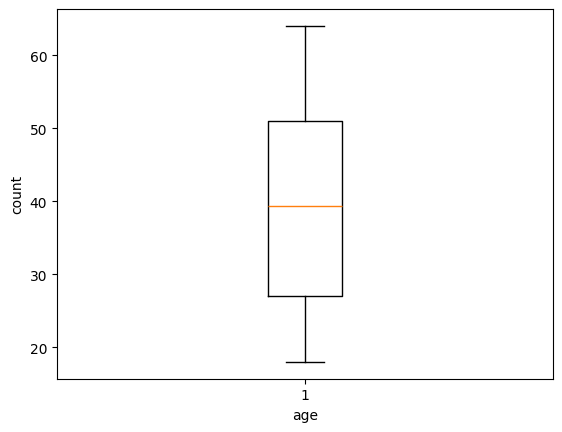

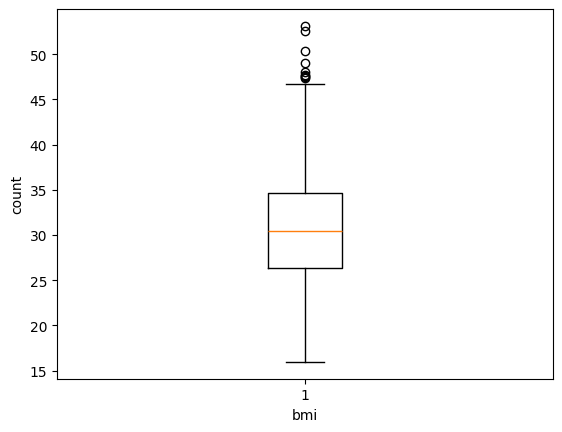

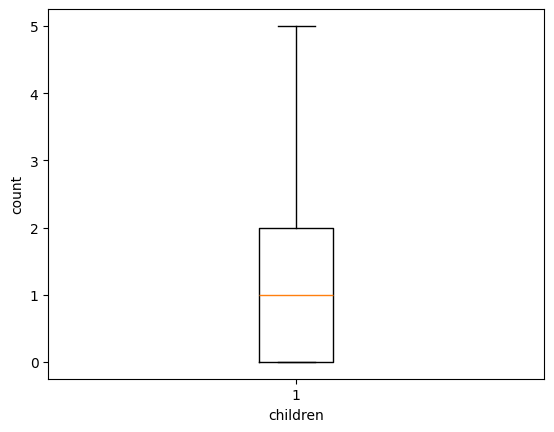

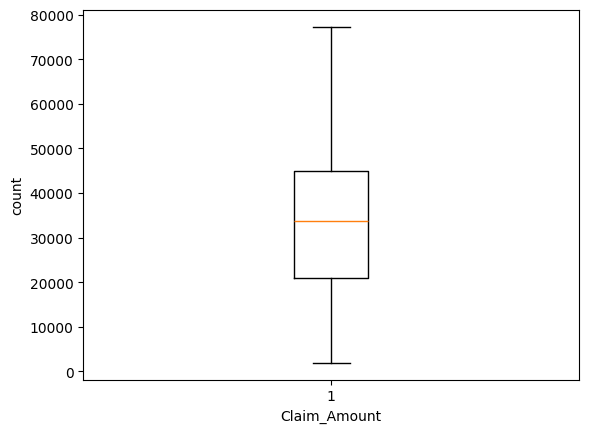

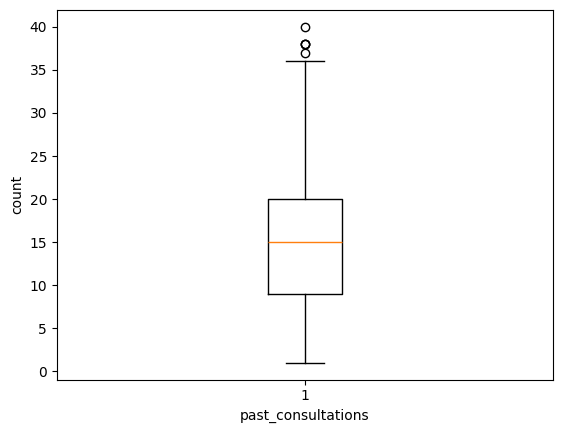

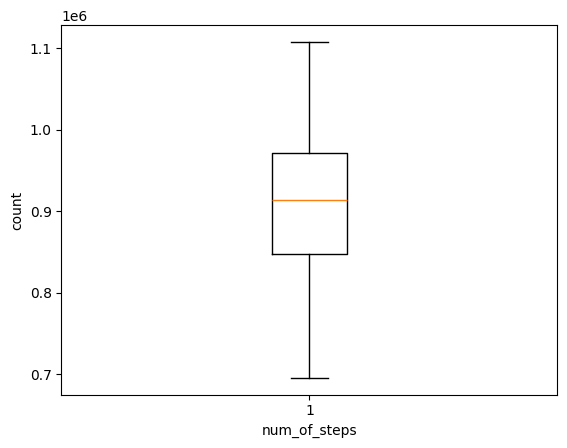

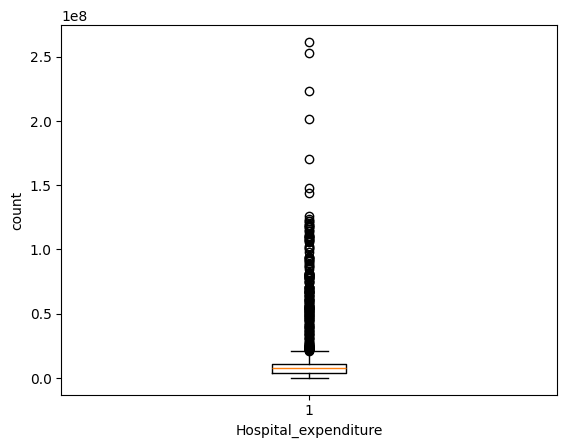

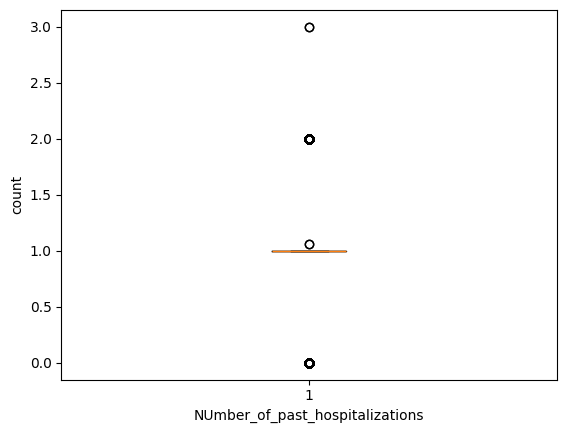

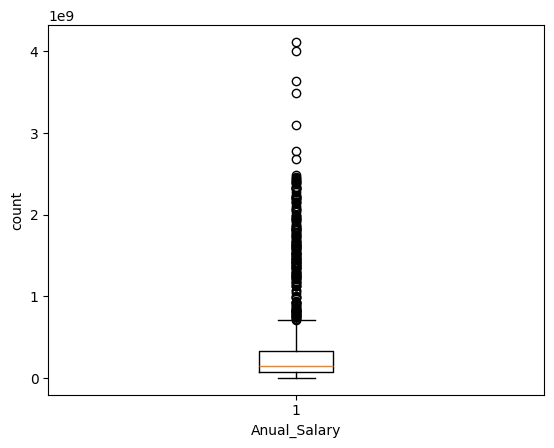

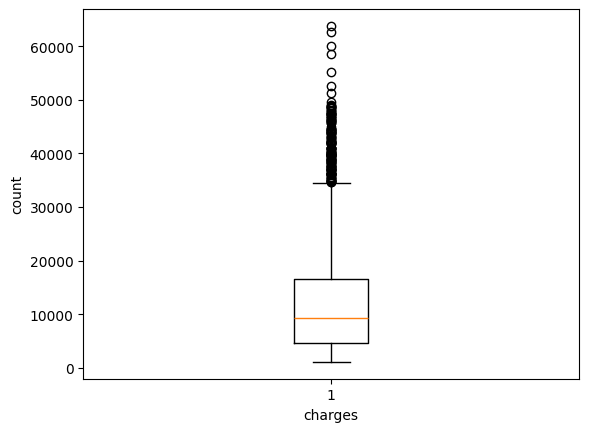

In [17]:
for x in col_list:
  if df[x].dtypes=='object':
    continue
  plt.boxplot(df[x])
  plt.xlabel(x)
  plt.ylabel("count")
  plt.show()

In [19]:
for x in col_list:
  if df[x].dtypes=='object' or x=='charges':
    continue
  Q1=df[x].quantile(0.25)
  Q3=df[x].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  df=df[(df[x]>=lower_bound) & (df[x]<=upper_bound)]

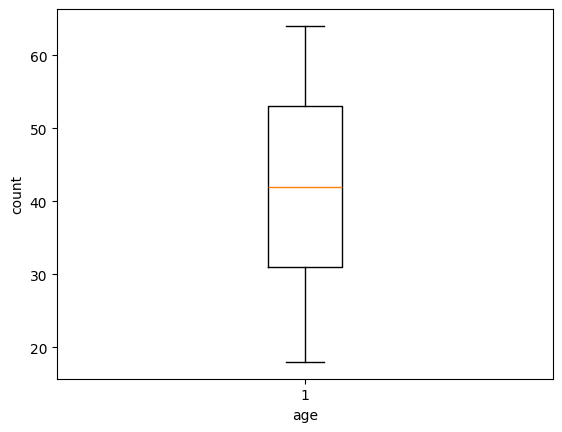

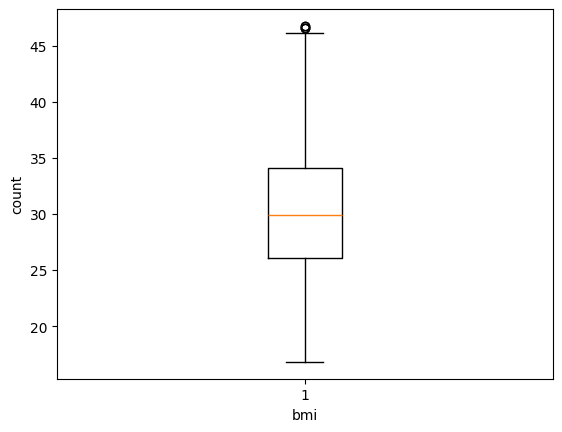

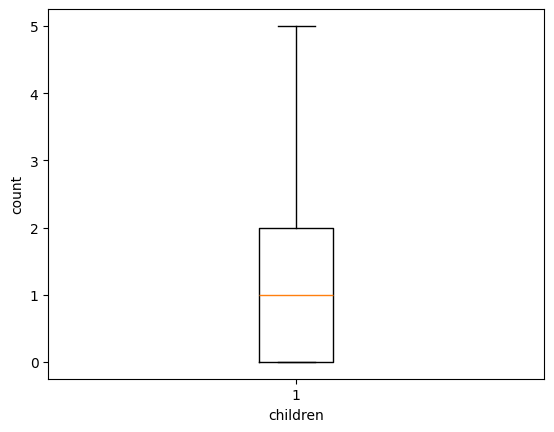

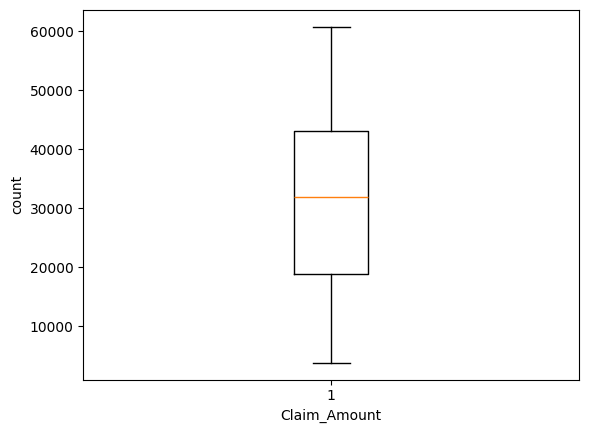

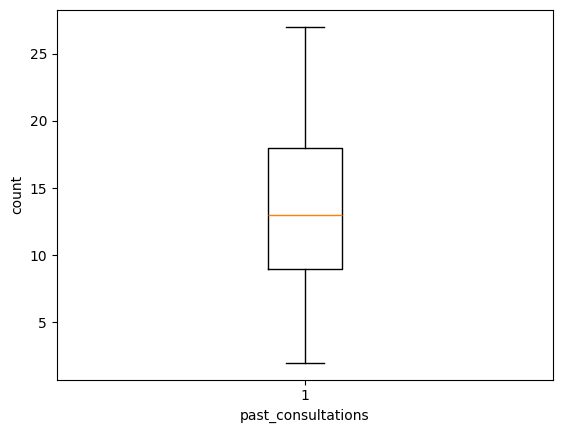

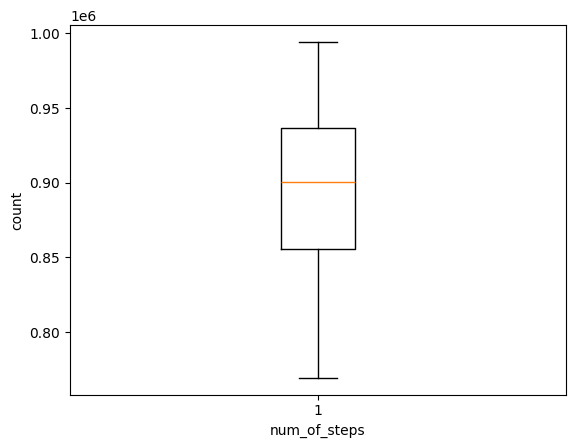

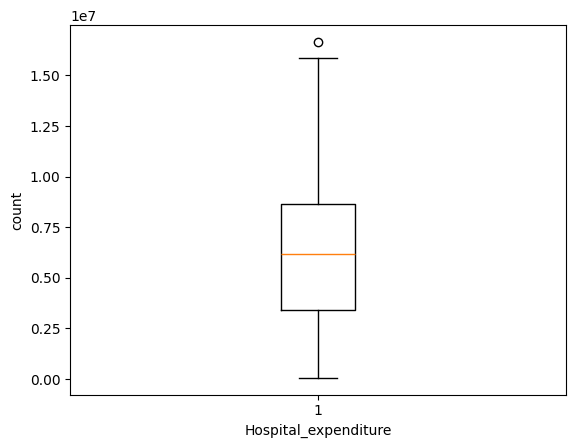

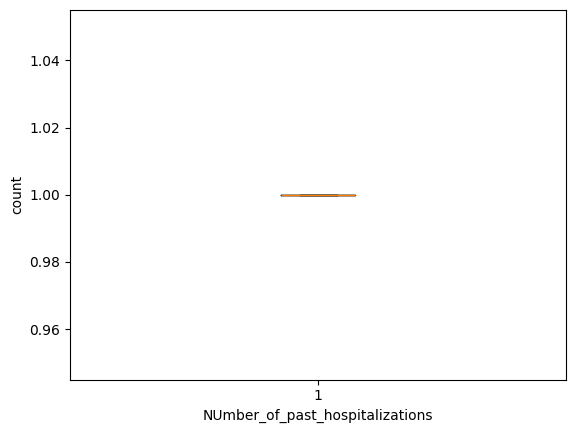

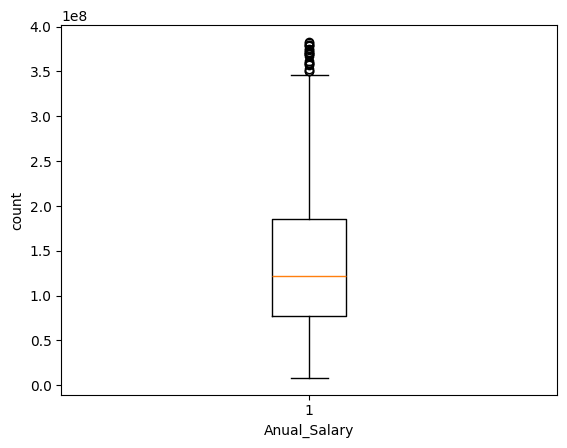

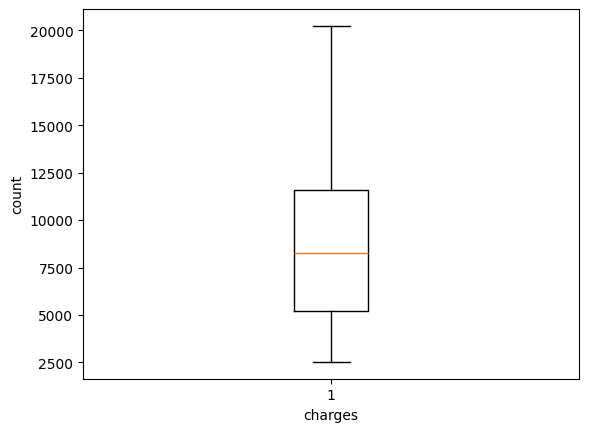

In [20]:
for x in col_list:
  if df[x].dtypes=='object':
    continue
  plt.boxplot(df[x])
  plt.xlabel(x)
  plt.ylabel("count")
  plt.show()

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le=LabelEncoder()

In [24]:
for x in col_list:
  if df[x].dtypes=='object':
    df[x] = le.fit_transform(df[x])

In [25]:
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
151,25.0,1,27.550,0.0,0,39148.95495,10.0,780652.0,8.614147e+06,1.0,5.452601e+07,1,2523.16950
152,22.0,0,20.235,0.0,0,41547.52536,13.0,802627.0,2.491594e+05,1.0,1.671847e+07,1,2527.81865
153,25.0,1,35.625,0.0,0,39660.60193,12.0,770773.0,3.043323e+06,1.0,4.852694e+07,1,2534.39375
154,20.0,1,31.130,2.0,0,16032.87148,7.0,769255.0,1.599069e+06,1.0,2.441262e+07,2,2566.47070
155,21.0,0,17.400,1.0,0,31090.98977,21.0,778769.0,3.015365e+06,1.0,5.853579e+07,3,2585.26900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,29.0,0,27.940,1.0,1,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08,2,19107.77960
1048,31.0,1,25.900,3.0,1,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08,3,19199.94400
1050,31.0,1,29.810,0.0,1,24382.58056,21.0,973924.0,1.028991e+07,1.0,3.745310e+08,2,19350.36890
1062,43.0,0,20.045,2.0,1,21596.43846,10.0,994419.0,1.083030e+07,1.0,3.696849e+08,0,19798.05455


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [40]:
X = df.drop('charges', axis=1)
y = df['charges']

In [41]:
X

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
151,25.0,1,27.550,0.0,0,39148.95495,10.0,780652.0,8.614147e+06,1.0,5.452601e+07,1
152,22.0,0,20.235,0.0,0,41547.52536,13.0,802627.0,2.491594e+05,1.0,1.671847e+07,1
153,25.0,1,35.625,0.0,0,39660.60193,12.0,770773.0,3.043323e+06,1.0,4.852694e+07,1
154,20.0,1,31.130,2.0,0,16032.87148,7.0,769255.0,1.599069e+06,1.0,2.441262e+07,2
155,21.0,0,17.400,1.0,0,31090.98977,21.0,778769.0,3.015365e+06,1.0,5.853579e+07,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1046,29.0,0,27.940,1.0,1,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08,2
1048,31.0,1,25.900,3.0,1,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08,3
1050,31.0,1,29.810,0.0,1,24382.58056,21.0,973924.0,1.028991e+07,1.0,3.745310e+08,2
1062,43.0,0,20.045,2.0,1,21596.43846,10.0,994419.0,1.083030e+07,1.0,3.696849e+08,0


In [42]:
Y

,charges
151,2523.16950
152,2527.81865
153,2534.39375
154,2566.47070
155,2585.26900
...,...
1046,19107.77960
1048,19199.94400
1050,19350.36890
1062,19798.05455


In [43]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.80)

In [44]:
x_train

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
390,34.0,0,26.410,1.0,0,44384.754190,16.0,863220.0,9.513977e+06,1.0,3.985667e+07,1
825,59.0,1,26.400,0.0,0,21761.745060,18.0,927015.0,5.876375e+06,1.0,2.315195e+08,2
770,49.0,0,41.470,4.0,0,52894.664920,15.0,933341.0,5.976700e+06,1.0,1.363661e+08,2
536,39.0,0,34.100,3.0,0,33660.785440,13.0,890593.0,2.746996e+06,1.0,8.752788e+07,3
330,19.0,0,28.600,5.0,0,8922.632575,8.0,849240.0,3.782104e+06,1.0,9.378887e+07,3
...,...,...,...,...,...,...,...,...,...,...,...,...
857,58.0,0,28.215,0.0,0,11409.751700,15.0,936664.0,8.923532e+06,1.0,1.738868e+08,1
302,29.0,1,31.730,2.0,0,27908.758260,13.0,832030.0,4.719800e+06,1.0,6.134519e+07,1
862,56.0,0,37.510,2.0,0,27390.753100,18.0,936905.0,8.352039e+06,1.0,2.200270e+08,2
809,54.0,0,32.300,1.0,0,43711.972380,13.0,922636.0,5.577876e+06,1.0,2.143823e+08,0


In [45]:
x_test

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
1019,28.0,1,23.980000,3.0,1,41686.19886,12.0,974518.0,8.679934e+06,1.0,3.225795e+08,2
164,26.0,1,31.065000,0.0,0,31301.23153,5.0,791666.0,2.151012e+06,1.0,6.196575e+07,1
277,31.0,0,21.755000,0.0,0,50782.31732,20.0,840107.0,3.785735e+06,1.0,9.534744e+07,1
359,34.0,0,26.730000,1.0,0,26144.64566,9.0,862161.0,3.004787e+06,1.0,7.107230e+07,2
775,56.0,0,25.300000,0.0,0,44884.69133,18.0,924785.0,3.541519e+06,1.0,1.266765e+08,3
...,...,...,...,...,...,...,...,...,...,...,...,...
716,46.0,1,25.800000,5.0,0,16042.47050,14.0,928476.0,7.993621e+06,1.0,1.034678e+08,3
297,25.0,0,24.300000,3.0,0,25836.04059,17.0,832075.0,7.873228e+06,1.0,5.739460e+07,3
331,30.0,0,21.945000,1.0,0,34044.08699,20.0,834004.0,8.215203e+06,1.0,5.310594e+07,0
516,42.0,1,37.180000,2.0,0,51466.02322,16.0,881594.0,3.901163e+05,1.0,6.759640e+07,2


In [46]:
y_train

,charges
390,5385.33790
825,11743.29900
770,10977.20630
536,7418.52200
330,4687.79700
...,...
857,12224.35085
302,4433.38770
862,12265.50690
809,11512.40500


In [47]:
linear_model=LinearRegression()

In [48]:
linear_model.fit(x_train,y_train)

LinearRegression()

In [49]:
model_predict=linear_model.predict(x_test)

In [50]:
from sklearn.metrics import r2_score

In [51]:
accuracy=r2_score(y_test,model_predict)

In [53]:
accuracy*100

96.37270906281336

In [54]:
!pip install gradio

In [55]:
import gradio as gr

def predict_charges(age, sex, bmi, children, smoker, Claim_Amount, past_consultations, num_of_steps, Hospital_expenditure, NUmber_of_past_hospitalizations, Anual_Salary, region):
    # Create a pandas DataFrame from the input values
    input_data = pd.DataFrame({
        'age': [age],
        'sex': [sex],
        'bmi': [bmi],
        'children': [children],
        'smoker': [smoker],
        'Claim_Amount': [Claim_Amount],
        'past_consultations': [past_consultations],
        'num_of_steps': [num_of_steps],
        'Hospital_expenditure': [Hospital_expenditure],
        'NUmber_of_past_hospitalizations': [NUmber_of_past_hospitalizations],
        'Anual_Salary': [Anual_Salary],
        'region': [region]
    })
    # Predict the charges using the trained model
    prediction = linear_model.predict(input_data)
    return prediction[0]

# Create the Gradio interface
interface = gr.Interface(
    fn=predict_charges,
    inputs=[
        gr.Number(label="Age"),
        gr.Number(label="Sex (0 for female, 1 for male)"),
        gr.Number(label="BMI"),
        gr.Number(label="Children"),
        gr.Number(label="Smoker (0 for no, 1 for yes)"),
        gr.Number(label="Claim Amount"),
        gr.Number(label="Past Consultations"),
        gr.Number(label="Number of Steps"),
        gr.Number(label="Hospital Expenditure"),
        gr.Number(label="Number of Past Hospitalizations"),
        gr.Number(label="Annual Salary"),
        gr.Number(label="Region (Encoded)") # Assuming region is already encoded
    ],
    outputs=gr.Number(label="Predicted Charges"),
    title="Insurance Charge Prediction",
    description="Enter the details to predict the insurance charges."
)

# Launch the interface
interface.launch(inline=True)

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://3689ffe603757fe340.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Here's how you can upload your Colab notebook to GitHub:

1.  **Save your notebook**: Make sure your notebook is saved to your Google Drive. Go to `File > Save a copy in Drive`.
2.  **Go to GitHub**: Open your GitHub account in a web browser.
3.  **Create a new repository**: Click the '+' icon in the top right corner and select 'New repository'. Give your repository a name and description, and choose whether it should be public or private. You can also initialize it with a README file.
4.  **Connect Colab to GitHub**: In your Colab notebook, go to `File > Save a copy in GitHub`.
5.  **Authorize Colab**: If this is your first time connecting Colab to GitHub, you'll be asked to authorize Colab to access your GitHub repositories. Follow the prompts to authorize.
6.  **Choose your repository and commit**: Select the repository you just created from the dropdown list. You can add a commit message describing the changes (e.g., "Initial commit of insurance prediction notebook").
7.  **Click OK**: This will save a copy of your notebook to the selected GitHub repository.

Now you can share the link to your GitHub repository with others!